# House Price Prediction

### Importing all Libraries

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### Reading the data

In [47]:
df= pd.read_csv('Gdscfinal.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12808\2267279044.py:1: DtypeWarning: Columns (1,7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Gdscfinal.csv')


In [48]:
df.head()

,url,id,Lng,Lat,Cid,DOM,totalPrice,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,elevator,fiveYearsProperty,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,1464.0,415.0,2,1,1,1,1.0,2005,3,1.0,0.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,903.0,575.0,2,2,1,2,1.0,2004,4,1.0,1.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,1271.0,1030.0,3,2,1,3,4.0,2005,3,1.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,965.0,297.5,3,1,1,1,1.0,2008,1,1.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,927.0,392.0,2,1,1,1,4.0,1960,2,0.0,1.0,1,62588.0


In [49]:
df

,url,id,Lng,Lat,Cid,DOM,totalPrice,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,elevator,fiveYearsProperty,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,1464.0,415.0,2,1,1,1,1.0,2005,3,1.0,0.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,903.0,575.0,2,2,1,2,1.0,2004,4,1.0,1.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,1271.0,1030.0,3,2,1,3,4.0,2005,3,1.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,965.0,297.5,3,1,1,1,1.0,2008,1,1.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,927.0,392.0,2,1,1,1,4.0,1960,2,0.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,1.0,350.0,3,2,1,2,4.0,2003,1,0.0,1.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,NaN,108.8,1,0,1,1,1.0,2009,1,1.0,0.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,1.0,359.0,2,2,1,2,4.0,2000,3,1.0,1.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,NaN,720.0,4,2,1,2,4.0,2003,4,0.0,1.0,3,54842.0


### Removing the unwanted columns

In [51]:
#url id and cid will not contribute in price of the house
df.drop(['url','id','Cid'],axis=1,inplace=True) 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   DOM                  160874 non-null  float64
 3   totalPrice           318851 non-null  float64
 4   livingRoom           318851 non-null  object 
 5   drawingRoom          318851 non-null  object 
 6   kitchen              318851 non-null  int64  
 7   bathRoom             318851 non-null  object 
 8   buildingType         316830 non-null  float64
 9   constructionTime     318851 non-null  object 
 10  renovationCondition  318851 non-null  int64  
 11  elevator             318819 non-null  float64
 12  fiveYearsProperty    318819 non-null  float64
 13  district             318851 non-null  int64  
 14  communityAverage     318388 non-null  float64
dtypes: float64(8), in

### Checking for null values

In [54]:
df.isnull().sum()

Lng                         0
Lat                         0
DOM                    157977
totalPrice                  0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
buildingType             2021
constructionTime            0
renovationCondition         0
elevator                   32
fiveYearsProperty          32
district                    0
communityAverage          463
dtype: int64

In [55]:
#Will drop DOM column as it contains many null values , constructionTime as it doesn't effect price much+ it is of object type
df.drop(['DOM','constructionTime'],axis=1,inplace=True)

In [56]:
df

,Lng,Lat,totalPrice,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,elevator,fiveYearsProperty,district,communityAverage
0,116.475489,40.019520,415.0,2,1,1,1,1.0,3,1.0,0.0,7,56021.0
1,116.453917,39.881534,575.0,2,2,1,2,1.0,4,1.0,1.0,7,71539.0
2,116.561978,39.877145,1030.0,3,2,1,3,4.0,3,1.0,0.0,7,48160.0
3,116.438010,40.076114,297.5,3,1,1,1,1.0,1,1.0,0.0,6,51238.0
4,116.428392,39.886229,392.0,2,1,1,1,4.0,2,0.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,116.546899,39.755236,350.0,3,2,1,2,4.0,1,0.0,1.0,3,36545.0
318847,116.497474,39.810115,108.8,1,0,1,1,1.0,1,1.0,0.0,3,54282.0
318848,116.497256,39.804081,359.0,2,2,1,2,4.0,3,1.0,1.0,3,46927.0
318849,116.501794,39.799347,720.0,4,2,1,2,4.0,4,0.0,1.0,3,54842.0


In [59]:
df.isnull().sum()

Lng                       0
Lat                       0
totalPrice                0
livingRoom                0
drawingRoom               0
kitchen                   0
bathRoom                  0
buildingType           2021
renovationCondition       0
elevator                 32
fiveYearsProperty        32
district                  0
communityAverage        463
dtype: int64

### Data cleaning

In [65]:
# the columns elevator and fiveYearsProperty contains less null values -> we can remove them



# removing all rows from the DataFrame df where there are missing values (NaN) in either the 'elevator' or 'fiveYearsProperty' columns, and it updates the DataFrame df in place.

df.dropna(subset=['elevator','fiveYearsProperty'],inplace=True) 

In [68]:
#checking number of rows and columns
df.shape

(318819, 13)

In [70]:
df.isnull().sum()

Lng                       0
Lat                       0
totalPrice                0
livingRoom                0
drawingRoom               0
kitchen                   0
bathRoom                  0
buildingType           2021
renovationCondition       0
elevator                  0
fiveYearsProperty         0
district                  0
communityAverage        463
dtype: int64

In [71]:
#for understanding the distribution of data within that column, we will see how many times each type of building appears in the 'buildingType' column
df['buildingType'].value_counts()

buildingType
4.0    172405
1.0     84541
3.0     59715
2.0       137
Name: count, dtype: int64

In [73]:
# replacing missing values in the 'buildingType' column with the most frequently occurring building type.
#since there are Limited Set of Repeating Values we will fill the missing values with mode
df['buildingType'].fillna(df['buildingType'].mode()[0],inplace=True) #Since .mode() returns a Series, the most frequent value (the mode) is accessed using [0], which gets the first mode if there are multiple.

In [75]:
df.isnull().sum()

Lng                      0
Lat                      0
totalPrice               0
livingRoom               0
drawingRoom              0
kitchen                  0
bathRoom                 0
buildingType             0
renovationCondition      0
elevator                 0
fiveYearsProperty        0
district                 0
communityAverage       463
dtype: int64

In [79]:
#checking distribution for community average
df['communityAverage'].value_counts()

communityAverage
92360.0     1525
54263.0     1499
40934.0     1350
50205.0     1331
64222.0     1247
            ... 
37270.0        1
62427.0        1
80732.0        1
41678.0        1
130768.0       1
Name: count, Length: 4072, dtype: int64

In [81]:
#since there is large distribution we will fill the null values with median

#will group the DataFrame df by the 'district' column, creating separate groups for each unique value in 'district'.
#After grouping, we will accesses the 'communityAverage' column within each group.
#.transform('median'):This applies the 'median' function to each group of 'communityAverage' within each 'district', calculating the median value for that column within each group.
#The .transform() function returns a Series that matches the original DataFrame’s index but replaces the grouped values with the median for each group. This allows the median value to align correctly with the rows that need to be filled.


df['communityAverage'].fillna(df.groupby('district')['communityAverage'].transform('median'),inplace=True)

### Pairwise correlation of columns in a DataFrame.

In [85]:
df.corr() 

,Lng,Lat,totalPrice,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,elevator,fiveYearsProperty,district,communityAverage
Lng,1.000000,0.040814,-0.070037,-0.010757,0.072040,0.066397,0.060364,0.006335,-0.006260,0.044275,0.009599,0.223667,-0.175561
Lat,0.040814,1.000000,0.019940,0.087554,0.058297,-0.000049,0.090939,0.098737,0.011886,-0.102542,0.009689,0.308621,-0.068452
totalPrice,-0.070037,0.019940,1.000000,0.434312,0.322706,0.086425,0.442433,-0.054345,0.250777,0.192345,-0.003225,0.010383,0.420162
livingRoom,-0.010757,0.087554,0.434312,1.000000,0.489589,0.100452,0.552904,0.127046,0.010275,-0.078271,0.045774,0.012382,-0.057463
drawingRoom,0.072040,0.058297,0.322706,0.489589,1.000000,0.131911,0.525766,0.082410,-0.008374,0.044483,0.007589,0.010230,-0.096371
kitchen,0.066397,-0.000049,0.086425,0.100452,0.131911,1.000000,0.117101,0.017412,-0.005363,-0.005167,0.045779,-0.037226,0.022409
bathRoom,0.060364,0.090939,0.442433,0.552904,0.525766,0.117101,1.000000,0.036692,0.025511,0.114111,-0.031551,-0.001871,-0.068847
buildingType,0.006335,0.098737,-0.054345,0.127046,0.082410,0.017412,0.036692,1.000000,-0.011305,-0.630299,-0.002211,0.042697,-0.092671
renovationCondition,-0.006260,0.011886,0.250777,0.010275,-0.008374,-0.005363,0.025511,-0.011305,1.000000,0.051438,0.121006,-0.009674,0.008987
elevator,0.044275,-0.102542,0.192345,-0.078271,0.044483,-0.005167,0.114111,-0.630299,0.051438,1.000000,-0.119514,-0.064090,0.085782


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   totalPrice           318819 non-null  float64
 3   livingRoom           318819 non-null  object 
 4   drawingRoom          318819 non-null  object 
 5   kitchen              318819 non-null  int64  
 6   bathRoom             318819 non-null  object 
 7   buildingType         318819 non-null  float64
 8   renovationCondition  318819 non-null  int64  
 9   elevator             318819 non-null  float64
 10  fiveYearsProperty    318819 non-null  float64
 11  district             318819 non-null  int64  
 12  communityAverage     318819 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 34.1+ MB


In [89]:
df.head()

,Lng,Lat,totalPrice,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,elevator,fiveYearsProperty,district,communityAverage
0,116.475489,40.019520,415.0,2,1,1,1,1.0,3,1.0,0.0,7,56021.0
1,116.453917,39.881534,575.0,2,2,1,2,1.0,4,1.0,1.0,7,71539.0
2,116.561978,39.877145,1030.0,3,2,1,3,4.0,3,1.0,0.0,7,48160.0
3,116.438010,40.076114,297.5,3,1,1,1,1.0,1,1.0,0.0,6,51238.0
4,116.428392,39.886229,392.0,2,1,1,1,4.0,2,0.0,1.0,1,62588.0


### Converting objects into int 

In [92]:
df['livingRoom']=df['livingRoom'].astype('int64')
df['drawingRoom']=df['drawingRoom'].astype('int64')
df['bathRoom']=df['bathRoom'].astype('int64')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   totalPrice           318819 non-null  float64
 3   livingRoom           318819 non-null  int64  
 4   drawingRoom          318819 non-null  int64  
 5   kitchen              318819 non-null  int64  
 6   bathRoom             318819 non-null  int64  
 7   buildingType         318819 non-null  float64
 8   renovationCondition  318819 non-null  int64  
 9   elevator             318819 non-null  float64
 10  fiveYearsProperty    318819 non-null  float64
 11  district             318819 non-null  int64  
 12  communityAverage     318819 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 34.1 MB


### Train test split

In [97]:
X = df.drop(['totalPrice'],axis=1)
y = df['totalPrice']

In [99]:
X.shape

(318819, 12)

In [101]:
y.shape

(318819,)

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Applying linear Regression

In [106]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [110]:
lr.fit(X_train, y_train)

LinearRegression()

In [114]:
from sklearn import metrics

y_pred = lr.predict(X_test)

### Checking accuracy

In [116]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

In [118]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (MAE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 105.03316014500814
Mean Squared Error (MSE): 25555.92734339089
Root Mean Squared Error (MAE): 159.86221361970092
R-squared (R2): 0.5314211423454


- MAE (105.03): On average, your predictions are off by about 105 units.
- MSE (25,555.93): The average of the squared differences between predicted and actual values, indicating some large errors.
- RMSE (159.86): On average, your predictions deviate from the actual values by about 160 units.
- R² (0.531): Your model explains about 53.1% of the variability in the data. This means your model is capturing more than half of the variance, but there's still 46.9% of the variance that the model does not explain.

In [120]:
import seaborn as sns
from sklearn.metrics import mean_squared_error

<Axes: xlabel='totalPrice'>

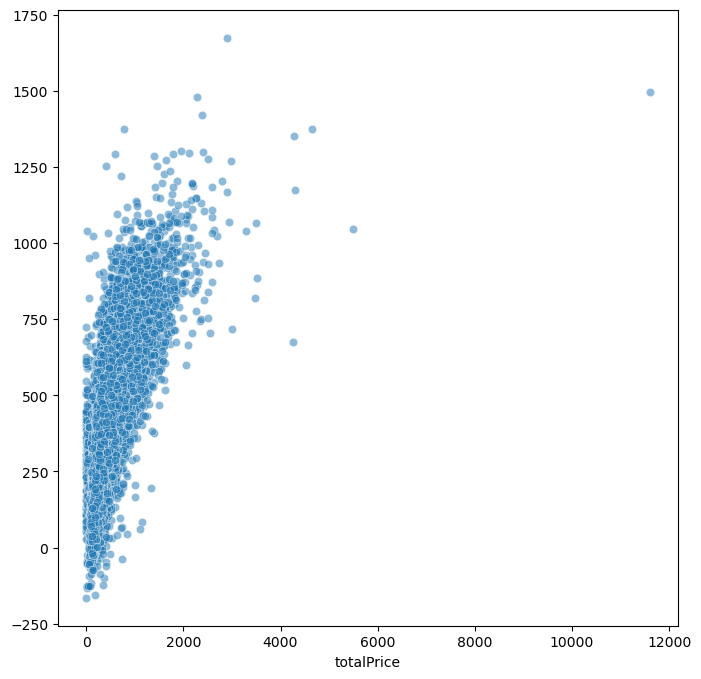

In [124]:
plt.figure(figsize=(8,8))

sns.scatterplot(x = y_test, y = y_pred, alpha = 0.5)

<Axes: title={'center': 'Scatter Plot'}, xlabel='totalPrice', ylabel='Predicted Value'>

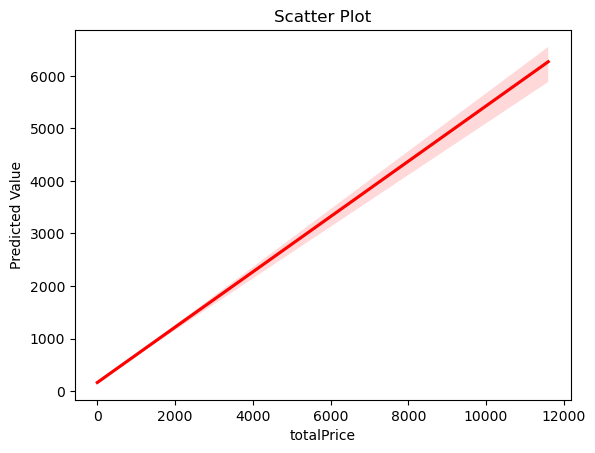

In [126]:
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')